In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###PreProcessing Data into DataFrame
def preprocess(in_file):
    count=0
    arr=[]
    f=open(in_file,'r')
    line=f.readline()
    while line:
        line=line.replace('\n','')
        json_obj=json.loads(line)
        if "author_name" in json_obj:
            arr.append(json_obj)
        line=f.readline()
        count+=1
    f.close()

    print "Total Amount="+str(count)
    return arr

def get_key(arr,key,type):
    arr2=[]
    for i in range(0,len(arr)):
        json_obj=arr[i]
        if key in json_obj:
            if type=='integer':
                value=int(json_obj[key].replace(',',''))
            else:
                value=json_obj[key]
        else:
            value=None
        arr2.append(value)
    return np.array(arr2)

In [3]:
in_file='../SingleJSON_experiences2.txt'
arr_jsons=preprocess(in_file)
print len(arr_jsons)

author_names=get_key(arr_jsons,'author_name','string')
exp_ids=get_key(arr_jsons,'ExpId','integer')
exp_years=get_key(arr_jsons,'Exp Year','string')
exp_published=get_key(arr_jsons,'Published','string')
author_weights=get_key(arr_jsons,'author_weight','string')
author_gender=get_key(arr_jsons,'Gender','string')
exp_views=get_key(arr_jsons,'Views','integer')
dosage=get_key(arr_jsons,'dosage','string')

Total Amount=20948
20882


In [4]:
data=np.vstack((exp_ids,author_names,exp_years,exp_published,author_weights,author_gender,exp_views,dosage))
print data.T.shape

(20882, 8)


In [5]:
df = pd.DataFrame(data=data.T,
                  index=exp_ids,
                  columns=['ExpId','AuthorName','ExpYears','ExpPublished','AuthorWeights','AuthorGender','ExpViews','Dosage'])

In [6]:
#Transformations
df['AuthorName']=df['AuthorName'].str.lower()

AUTHORS- Experiences Plots
=================================

1 474


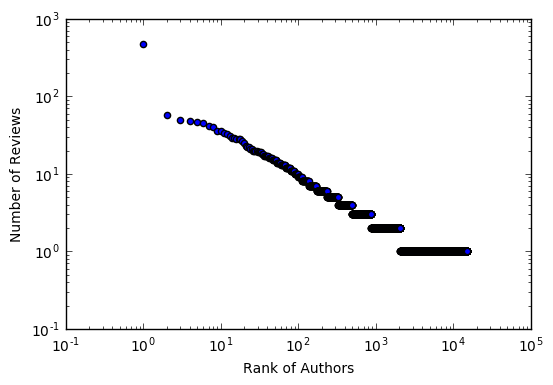

In [7]:
author_number=pd.value_counts(df['AuthorName'])

arr_values=[]
ranks=[]
rank=1
name_labels=[]
for key in author_number.keys():
    ranks.append(rank)
    rank+=1
    arr_values.append(author_number[key])

print ranks[0],arr_values[0]
plt.scatter(ranks,arr_values,s=20)
#plt.text(ranks,arr_values,name_labels)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank of Authors')
plt.ylabel('Number of Reviews')

In [8]:
print author_number.head(10)
print "Mean="+str(np.mean(arr_values)),"Min="+str(np.min(arr_values)),"Max="+str(np.max(arr_values)),"Median="+str(np.median(arr_values))
print "Prctile 25="+str(np.percentile(arr_values,25))
print "Prctile 50="+str(np.percentile(arr_values,50))
print "Prctile 75="+str(np.percentile(arr_values,75))
print "Prctile 90="+str(np.percentile(arr_values,90))

anonymous           474
murple               58
xorkoth              50
morninggloryseed     48
anon                 47
sam                  46
mike                 41
catfish rivers       40
alex                 36
hypersphere          36
Name: AuthorName, dtype: int64
Mean=1.38898496741 Min=1 Max=474 Median=1.0
Prctile 25=1.0
Prctile 50=1.0
Prctile 75=1.0
Prctile 90=2.0


Body Weight - Experiences Plots
=================================

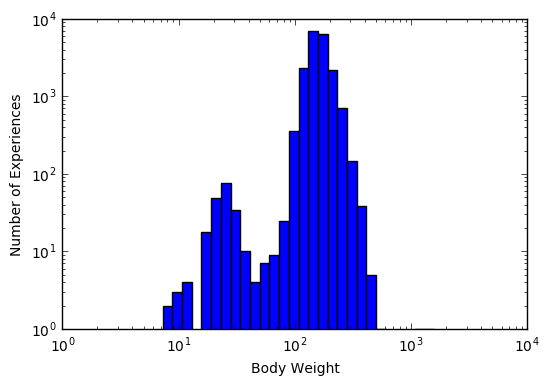

In [9]:
body_wts=df.AuthorWeights
weights=[]
ctr_none=0
for i in range(len(body_wts)):
    weight=body_wts[i]
    if weight==None:
        #Do Nothing
        ctr_none+=1
    elif "kg" in weight:
        weight=float(weight.split(" ")[0])
        weight=weight*2.20462
        weights.append(weight)
    elif "lb" in weight:
        weight=float(weight.split(" ")[0])
        weights.append(weight)
    elif "st" in weight:
        weight=float(weight.split(" ")[0])
        weight=weight*14
        weights.append(weight)        
    else:
        print "Not Found",weight

        
#plt.figure(figsize=(10,10));
plt.hist(weights, bins = np.logspace(np.log10(min(weights)+1), np.log10(max(weights)+1), 30));
plt.gca().set_xscale('log'); 
plt.gca().set_yscale('log')
plt.xlabel('Body Weight')
plt.ylabel('Number of Experiences')

Time - Experiences Plots
=================================

20882 20455 11


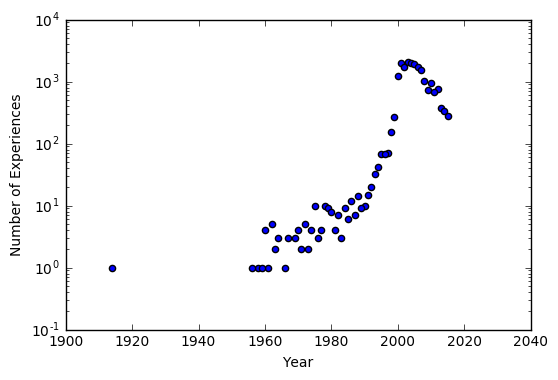

In [10]:
expYear=df.ExpYears
years=[]
ctr_none=0
for i in range(len(expYear)):
    year=expYear[i]
    if year==None:
        ctr_none+=1
    elif len(year)==4:
        years.append(int(year))

print len(expYear),len(years),ctr_none
year_dict=pd.value_counts(years)

x_arr=[];y_arr=[]
for key in year_dict.keys():
    if key<2016 and key>1900:
        x_arr.append(key)
        y_arr.append(year_dict[key])

plt.scatter(x_arr,y_arr,s=20)
#plt.hist(years, bins = np.logspace(np.log10(min(years)+1), np.log10(max(years)+1), 30));
#plt.gca().set_xscale('log'); 
plt.gca().set_yscale('log')
plt.xlabel('Year')
plt.ylabel('Number of Experiences')

Dosage Substance - Experience Plots
=================================

In [11]:
df_dosage=df['Dosage']
substance_arr=[]

for i in range(len(df_dosage)):
    substances=set()
    for key in df_dosage[i]:
        substances.add(key['substance'])

    for sub in substances:
        substance_arr.append(sub)

32912
1 3609


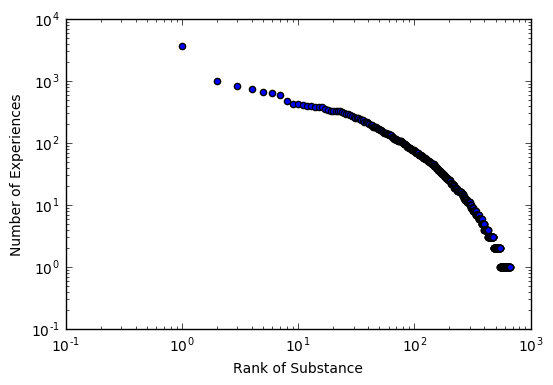

In [12]:
print len(substance_arr)
substance_counts=pd.value_counts(substance_arr)

arr_values=[]
ranks=[]
rank=1
name_labels=[]
for key in substance_counts.keys():
    ranks.append(rank)
    rank+=1
    arr_values.append(substance_counts[key])

print ranks[0],arr_values[0]
plt.scatter(ranks,arr_values,s=20)
#plt.text(ranks,arr_values,name_labels)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank of Substance')
plt.ylabel('Number of Experiences')

In [13]:
print substance_counts.head(10)
print "Mean="+str(np.mean(arr_values)),"Min="+str(np.min(arr_values)),"Max="+str(np.max(arr_values)),"Median="+str(np.median(arr_values))
print "Prctile 25="+str(np.percentile(arr_values,25))
print "Prctile 50="+str(np.percentile(arr_values,50))
print "Prctile 75="+str(np.percentile(arr_values,75))
print "Prctile 90="+str(np.percentile(arr_values,90))

Cannabis               3609
MDMA                   1015
LSD                     831
Salvia divinorum        755
Alcohol - Beer/Wine     655
Mushrooms               643
DXM                     592
Amphetamines            475
Cocaine                 431
Alcohol                 417
dtype: int64
Mean=49.641025641 Min=1 Max=3609 Median=8.0
Prctile 25=2.0
Prctile 50=8.0
Prctile 75=34.5
Prctile 90=117.0


Views - Experience Plots
========================

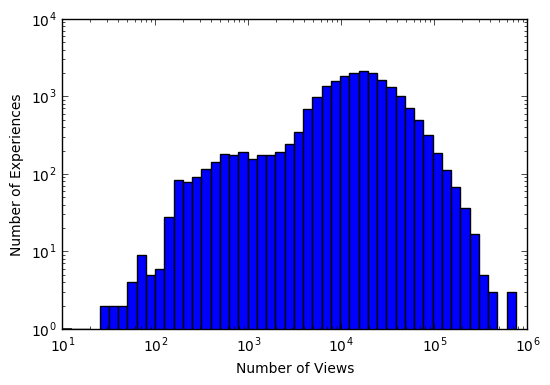

In [14]:
views=[]
df_views=df['ExpViews']
ctr_none=0

for i in range(len(df_views)):
    if df_views[i]==None:
        ctr_none+=1
    else:
        views.append(int(df_views[i]))

plt.hist(views, bins = np.logspace(np.log10(min(views)+1), np.log10(max(views)+1), 50));
plt.gca().set_xscale('log'); 
plt.gca().set_yscale('log')
plt.xlabel('Number of Views')
plt.ylabel('Number of Experiences')

Substance Co-Usage
==================

In [15]:
#Run External Script to get the network visualization.
import networkx as nx

In [25]:
edges=[]
f=open('../Analysis/CoUsage_Networks.txt','r')
line=f.readline()
while line:
    line=line.replace('\n','')
    split=line.split('\t')
    edges.append((split[0],split[1],float(split[2])))
    line=f.readline()
f.close()

In [32]:
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
G=nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G, iterations=100)

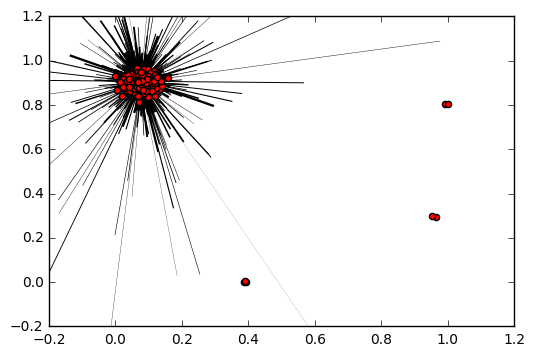

In [41]:
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, width=edgewidth,)

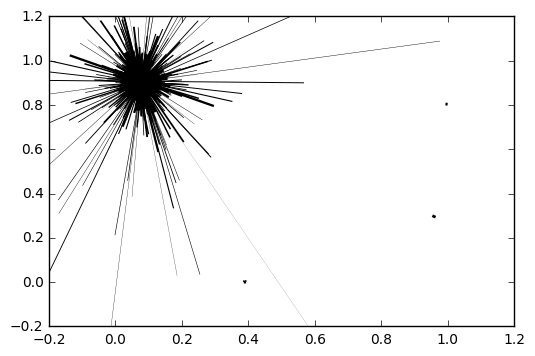